### Importing Libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing Data

In [4]:
# Path
path= r"C:\Users\nabar\OneDrive\Documents\03-2025 Instacart Basket Analysis"
# Dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

### Data Security 

Since this dataset contains personally identifiable information (PII), such as First Name, Last Name, Gender, STATE, Age, and date_joined, it’s crucial to address security risks before proceeding with analysis. Here are key steps to ensure data protection and compliance with privacy regulations:

1. Remove or Anonymize PII Data:
Drop columns like First Name and Last Name unless absolutely necessary.
Hash or encrypt identifiers (user_id) if customer tracking is required while maintaining anonymity.
Generalize geographic data (STATE) to regions instead of specific states.

2. Apply Data Access Controls:
Restrict dataset access to authorized personnel only.
Ensure the dataset is stored securely with encryption and access logs.

3. Ensure Compliance with Data Regulations:
If this data includes customer information from various locations, consider compliance with GDPR (Europe), CCPA (California), and other applicable regulations.

4. Secure Data in Transit and Storage:
Use secure data transmission protocols.
Store sensitive data in encrypted databases.

In [8]:
df['STATE'].value_counts(dropna=False)

STATE
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [9]:
# 4 geographic region
Northeast= ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest= ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South= ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West= ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']


In [10]:
# Creat new Region column
df.loc[df['STATE'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['STATE'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['STATE'].isin(South), 'region'] = 'South'
df.loc[df['STATE'].isin(West), 'region'] = 'West'

In [11]:
# Cheching the output
df['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [12]:
# Creating crosstab 
crosstab = pd.crosstab(df['region'], df['spender_flag'], dropna = False)
# Saving crosstab to clipboard
crosstab.to_clipboard()

In [13]:
crosstab

spender_flag,High_spender,Low_spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Text(0, 0.5, 'Count')

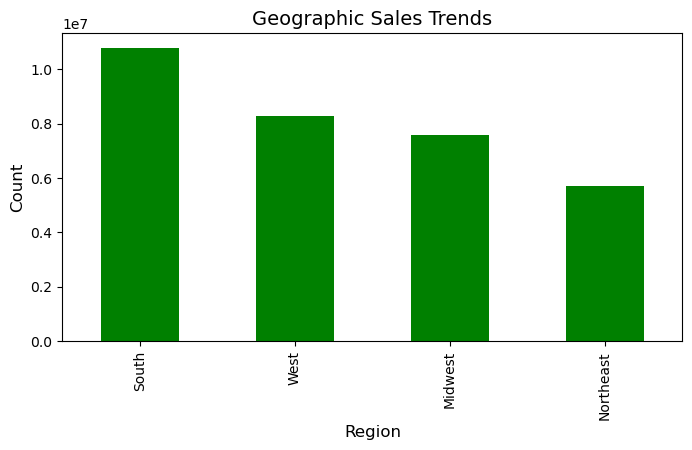

In [14]:
barchart_regional_counts = df['region'].value_counts().plot(kind='bar', color='green', figsize=(8, 4))

plt.title('Geographic Sales Trends', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12) 

### Observation: 
The bar chart shows that the South region has the highest number of purchases, followed by the West, Midwest, and Northeast. This suggests that Instacart sees the strongest demand in the South, likely due to a larger customer base or greater adoption of grocery delivery services. The West follows closely behind, indicating substantial customer engagement in that area. Sales in the Midwest and Northeast are lower, which could mean lower market penetration or adoption rates compared to other regions. These insights can help in refining marketing and operational strategies by strengthening efforts in lower-performing regions while optimizing promotions and services in high-performing areas such as the South.

In [16]:
# Exporting the bar chart
barchart_regional_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'geographic_sales_trend.png'))

In [117]:
crosstab_4 = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [119]:
crosstab_4.to_clipboard()

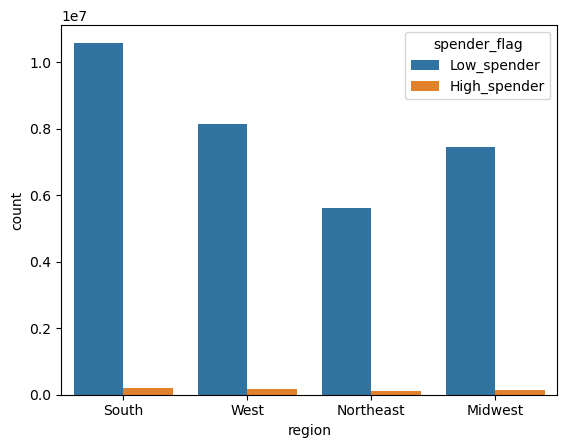

In [123]:
crossbar2 = sns.countplot(data=df, x='region', hue='spender_flag')

In [125]:
crossbar2.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_region_spender.png'))

### Exclusion flag for low-activity customers

In [18]:
# Creating 'activity_flag' 
df.loc[df['max_order'] < 5, 'activity_flag'] = 'Low_activity'
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'High_activity'

In [19]:
# Check the output
df['activity_flag'].value_counts(dropna=False)

activity_flag
High_activity    30964564
Low_activity      1440295
Name: count, dtype: int64

In [20]:
# Exclude the low activity customers 
Updated_df = df[df['activity_flag'] != 'Low_activity']

In [21]:
Updated_df['activity_flag'].value_counts(dropna=False)

activity_flag
High_activity    30964564
Name: count, dtype: int64

### Exporting the dataframe

In [23]:
Updated_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

In [24]:
# Create Age group variable
Updated_df.loc[Updated_df['Age'] <= 25, 'Age Group'] = 'Young'
Updated_df.loc[(Updated_df['Age'] > 25) & (Updated_df['Age'] <= 64), 'Age Group'] = 'Adults'
Updated_df.loc[Updated_df['Age'] > 64, 'Age Group'] = 'Senior'

C:\Users\nabar\AppData\Local\Temp\ipykernel_22088\80736099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Updated_df.loc[Updated_df['Age'] <= 25, 'Age Group'] = 'Young'


In [25]:
# Checking the output
Count_Age_Group = Updated_df['Age Group'].value_counts(dropna = False)

In [26]:
Count_Age_Group 

Age Group
Adults    18904502
Senior     8195544
Young      3864518
Name: count, dtype: int64

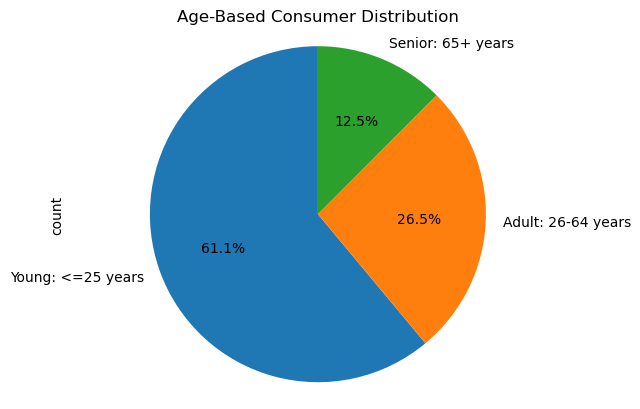

In [27]:
# Creating a pie chart
Age_Group_PieChart = Count_Age_Group.plot.pie(autopct='%1.1f%%', labels= ['Young: <=25 years', 'Adult: 26-64 years', 'Senior: 65+ years'], startangle=90)
plt.title('Age-Based Consumer Distribution')
plt.axis('equal') 
plt.show()

In [28]:
# Exporting the Pie chart
Age_Group_PieChart.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'AgeGroup_PieChart.png'))

### Observation:
The pie chart illustrates the distribution of age groups among customers, showing that young individuals aged 25 or younger make up the largest segment at 61.1%. Adults between the ages of 26 and 64 represent 26.5% of the customer base, while seniors aged 65 and older account for 12.5%. The data suggests that Instacart has a strong presence among younger customers, potentially indicating that digital grocery shopping is more widely adopted by younger demographics. Adult consumers still represent a significant portion, while seniors make up the smallest share, possibly due to less familiarity with online shopping platforms. These insights can guide targeted marketing strategies to address the needs and preferences of each age group

In [30]:
Updated_df['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [31]:
# Create an Income Group Variable
Updated_df.loc[Updated_df['income'] <= 90000, 'Income Group'] = 'Low'
Updated_df.loc[(Updated_df['income'] > 90000) & (Updated_df['income'] <= 130000), 'Income Group'] = 'Middle'
Updated_df.loc[Updated_df['income'] > 130000, 'Income Group'] = 'High'

C:\Users\nabar\AppData\Local\Temp\ipykernel_22088\1331549315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Updated_df.loc[Updated_df['income'] <= 90000, 'Income Group'] = 'Low'


In [32]:
Count_IncomeGroup = Updated_df['Income Group'].value_counts(dropna = False)

In [33]:
Count_IncomeGroup

Income Group
Low       13134732
Middle    10428418
High       7401414
Name: count, dtype: int64

Text(0, 0.5, 'count')

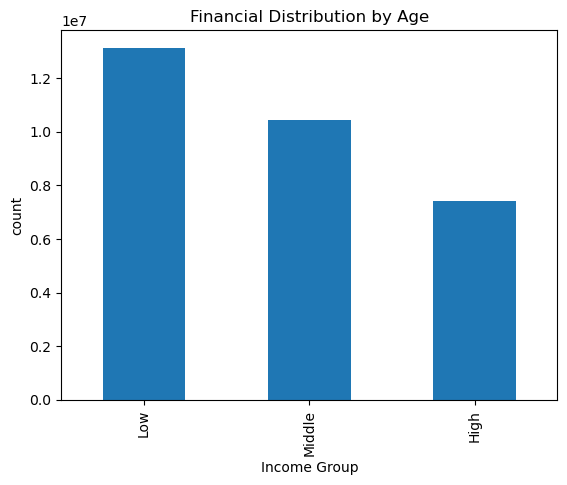

In [34]:
#Bar chart
IncomeGroup_BarChart = Count_IncomeGroup.plot.bar()
plt.title('Financial Distribution by Age')
plt.xlabel('Income Group')
plt.ylabel('count')

### Obsevation:
The bar chart illustrates the distribution of customers across different income groups based on the defined categories. The Low income group has the highest count, followed by the Middle income group, while the High income group represents the smallest segment. This suggests that a significant portion of customers fall within lower income brackets, indicating that affordability may be a key factor in purchasing behavior. The middle-income segment is also substantial, showing a balanced presence in spending capacity. The high-income group, though the smallest, represents potential opportunities for premium product targeting and specialized marketing strategies.

In [36]:
# Exporting the bar chart
IncomeGroup_BarChart.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'IncomeGroup_BarChart.png'))

In [37]:
# Creating a dependent flag variable
Updated_df.loc[Updated_df['Number_of_Dependents'] <1, 'dependents_flag'] = 'Single'
Updated_df.loc[Updated_df['Number_of_Dependents'] >= 1, 'dependents_flag'] = 'Parent'

C:\Users\nabar\AppData\Local\Temp\ipykernel_22088\4294105939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Updated_df.loc[Updated_df['Number_of_Dependents'] <1, 'dependents_flag'] = 'Single'


In [38]:
Count_DependentGroup = Updated_df['dependents_flag'].value_counts(dropna = False)
Count_DependentGroup

dependents_flag
Parent    23224883
Single     7739681
Name: count, dtype: int64

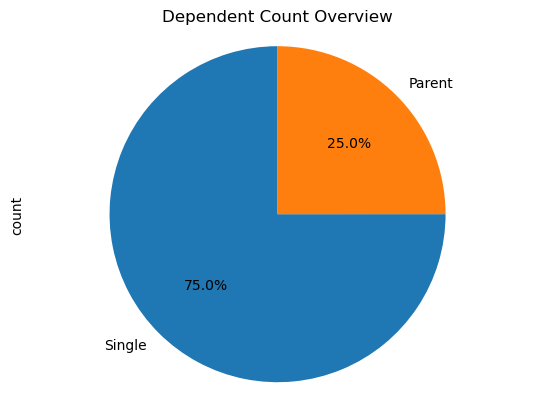

In [39]:
# Pie Chart
DependentGroup_PieChart = Count_DependentGroup.plot.pie(autopct='%1.1f%%', labels= ['Single', 'Parent'], startangle=90)
plt.title('Dependent Count Overview')
plt.axis('equal') 
plt.show()

### Observation:
The pie chart visually represents the distribution of customers based on their dependent status. The majority, 75%, fall under the "Single" category, meaning they have no dependents, while 25% are classified as "Parent," indicating they have at least one dependent. This suggests that a significant portion of Instacart's customer base consists of individuals without dependents, which could influence purchasing behavior, product preferences, and marketing strategies. The presence of a sizable parent segment also highlights opportunities for targeted promotions on family-oriented products and services. Understanding this distribution can help refine customer engagement strategies and optimize offerings for different household structures.

In [41]:
# Exporting the pie chart
DependentGroup_PieChart.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'DependentGroup_PieChart.png'))

In [42]:
# Crosstab
Crosstab_LoyaltyAgeGroup = pd.crosstab(Updated_df['loyalty_flag'], Updated_df['Age Group'], dropna = False)
Crosstab_LoyaltyAgeGroup

Age Group,Adults,Senior,Young
loyalty_flag,,,
Loyal customer,6279684,2723958,1280451
New customer,2927178,1276659,599858
Regular customer,9697640,4194927,1984209


Text(0.5, 0, '')

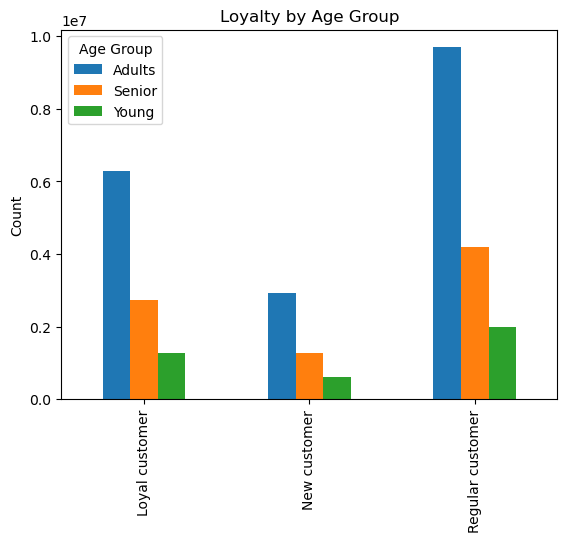

In [43]:
# Barchart
LoyaltyAgeGroup_BarChart = Crosstab_LoyaltyAgeGroup.plot.bar()
plt.title('Loyalty by Age Group')
plt.ylabel('Count')
plt.xlabel('')

### Observation:
The bar chart titled "Loyalty by Age Group" illustrates the distribution of customer loyalty across different age groups. Adults consistently have the highest count in all three loyalty categories—loyal customers, new customers, and regular customers—suggesting that they form the largest segment of Instacart's user base. Seniors follow as the second-largest group, while young customers represent the smallest portion across all loyalty categories. This trend indicates that middle-aged and older individuals are more engaged with Instacart, possibly due to their shopping habits and reliance on grocery delivery services. The lower engagement among younger customers may present an opportunity for targeted marketing strategies to increase adoption within that demographic.

In [45]:
# Exporting the Bar Chart
LoyaltyAgeGroup_BarChart.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'LoyaltyAgeGroup_BarChart.png'))

### Q7)Use Aggregation Functions on customer profile level 

In [47]:
# Aggregation function 
Updated_df.groupby('user_id').agg({'prices': ['max', 'min', 'mean']})


prices               
           max  min      mean
user_id                      
1         14.0  1.0  6.367797
2         14.8  1.3  7.515897
3         14.4  1.3  8.197727
4         14.6  1.4  8.205556
7         23.2  1.1  7.466990
...        ...  ...       ...
206203    25.0  1.0  7.138655
206206    14.8  1.1  7.646667
206207    24.7  1.2  7.313453
206208    21.6  1.1  8.366617
206209    18.8  1.1  7.058915

[162631 rows x 3 columns]

In [48]:
# Aggregation function 
Updated_df.groupby('user_id').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                 max min       mean
user_id                            
1                 10   1   5.813559
2                 14   1   8.035897
3                 12   1   6.000000
4                  5   1   2.888889
7                 20   1   9.645631
...              ...  ..        ...
206203             5   1   2.983193
206206            67   1  38.007018
206207            16   1   8.116592
206208            49   1  25.505170
206209            13   1   6.937984

[162631 rows x 3 columns]

### Q8)Compare the customer profiles with regions and departments

In [50]:
# Using crosstab functiion on Region and Department
Crosstab_Reg_Dep = pd.crosstab(Updated_df['region'], Updated_df['department_id'], dropna = False)

In [51]:
Crosstab_Reg_Dep

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
region,,,,,,,,,,,,,,,,,,,,,
Midwest,498225,7983,261753,2134115,34043,60666,598979,21358,193463,7929,...,158260,420334,156155,237459,1212490,166992,95741,645143,234464,15563
Northeast,370436,6268,199300,1593004,25017,44678,462929,17734,143817,5599,...,118571,312731,117904,176936,914616,124604,72712,493154,178398,11512
South,709906,11579,371620,3027476,48813,84649,859419,29909,272813,11180,...,224120,591754,223172,337458,1723016,230061,139511,916780,333620,21787
West,543164,8581,288155,2324678,36754,65998,650574,24059,212043,8743,...,173830,457886,173619,260221,1327060,178200,102428,711329,257352,15906


Text(0, 0.5, 'Region')

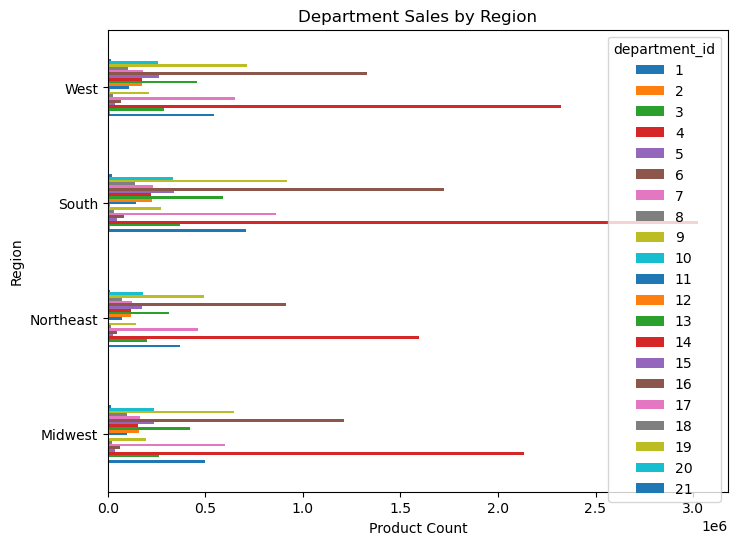

In [52]:
# Bar chart 
BarChart_RegionDepartment = Crosstab_Reg_Dep.plot(kind = 'barh',figsize=(8,6))
plt.title('Department Sales by Region')
plt.xlabel('Product Count')
plt.ylabel('Region')

### Observation:
The bar chart titled "Department Sales by Region" illustrates the distribution of product sales across different regions. The data suggests that certain regions have higher product counts in specific departments, highlighting variations in consumer demand based on location. Some regions show significantly higher engagement in certain categories, while others have lower sales volume. These patterns can help businesses tailor marketing strategies and inventory management to align with regional preferences, ensuring that supply meets demand effectively. Identifying these trends allows for a more targeted approach in optimizing product availability across different geographic areas.



In [54]:
# Exporting the bar chart
BarChart_RegionDepartment.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'BarChart_RegionDepartment.png'))

### Q9)

Text(0.5, 0, 'Hour of The Day')

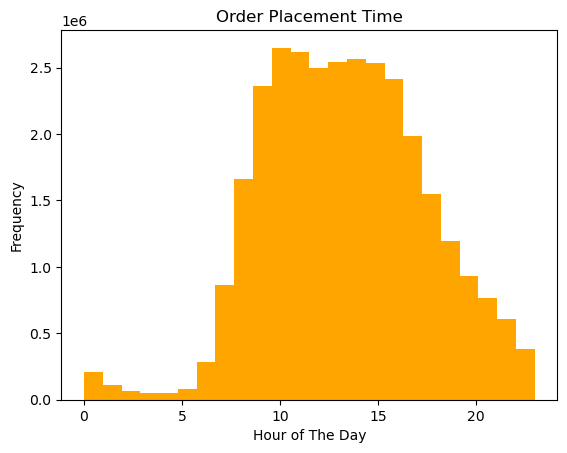

In [56]:
# Histogram
Time_Day_Histogram = Updated_df['order_hour_of_day'].plot.hist(bins = 24, color = 'orange')
plt.title('Order Placement Time')
plt.xlabel('Hour of The Day')

### Observation:
The histogram visualizes the distribution of order placement times throughout the day. The data shows that orders are most frequently placed between 8 AM and 6 PM, with a clear peak around noon. This trend suggests that customers tend to shop during late morning and early afternoon, possibly aligning with meal planning or midday convenience. Early morning and late-night orders are significantly lower, indicating that grocery shopping primarily occurs within standard waking hours. This insight can help optimize inventory, staffing, and promotional strategies during peak order times

In [58]:
# Exporting the Histogram
Time_Day_Histogram.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Time_Day_Histogram.png'))

In [59]:
crosstab_loyaltyflag_gender = pd.crosstab(Updated_df['loyalty_flag'],Updated_df['Gender'], dropna = False)

In [60]:
crosstab_loyaltyflag_gender

Gender,Female,Male
loyalty_flag,,
Loyal customer,5103187,5180906
New customer,2385307,2418388
Regular customer,7889330,7987446


Text(0, 0.5, '')

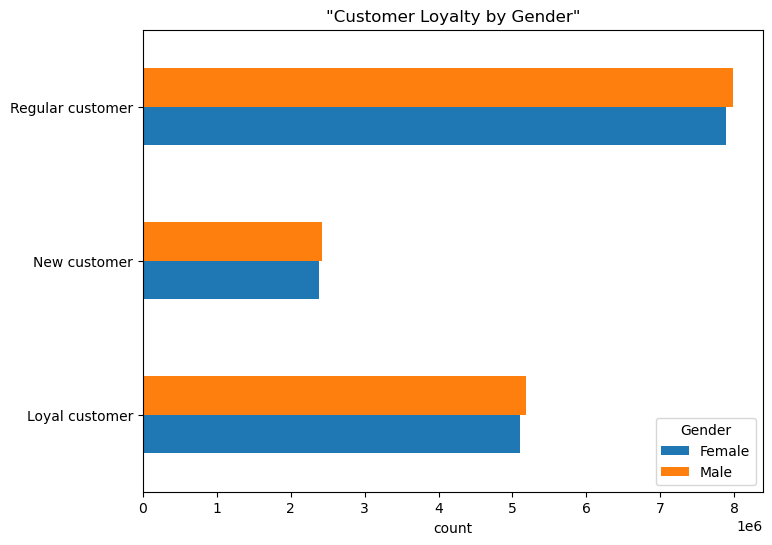

In [61]:
#Bar chart
Gender_BarChart = crosstab_loyaltyflag_gender.plot(kind = 'barh',figsize=(8,6))
plt.title('"Customer Loyalty by Gender"')
plt.xlabel('count')
plt.ylabel('')

### Observation:
The bar chart compares customer loyalty across genders, showing that male and female customers have similar distributions in all loyalty categories. Regular customers make up the largest group, followed by loyal customers, while new customers have the smallest presence. Male customers slightly outnumber female customers in each category, but the difference is minimal. This indicates that loyalty patterns do not vary significantly by gender, meaning marketing strategies targeting customer retention and engagement can be designed in a gender-neutral manner. The consistent distribution across categories suggests that loyalty is influenced more by factors other than gender, such as purchase frequency or product preferences.

In [63]:
# Exporting the bar chart
Gender_BarChart.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'BarChart_GenderLoyalty.png'))

In [64]:
Cross_Loyalty_Income = pd.crosstab(Updated_df['loyalty_flag'], Updated_df['Income Group'], dropna = False)

Text(0, 0.5, 'count')

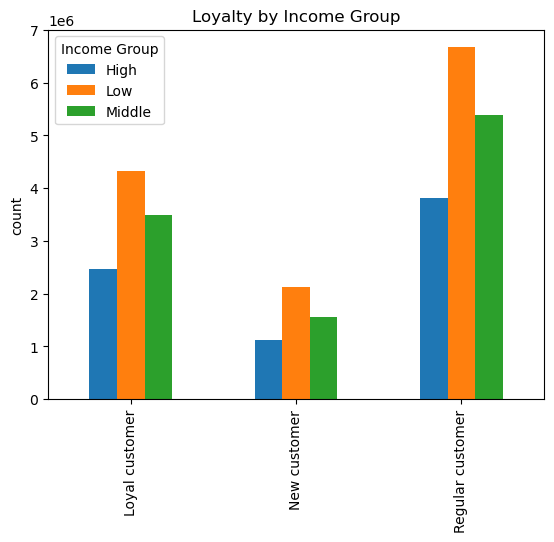

In [65]:
# Bar Chart
BarChart_LoyaltyIncome = Cross_Loyalty_Income.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')

### Observation:
The bar chart titled "Loyalty by Income Group" visualizes the distribution of customer loyalty across different income categories: High, Low, and Middle. The chart compares loyalty levels between two customer groups, with distinct colors representing each income bracket. The data suggests that loyalty levels vary across income groups, with certain segments showing stronger customer retention than others. This insight can be valuable for identifying patterns in consumer behavior and tailoring strategies to enhance engagement among different income demographics

In [67]:
# Exporting the bar chart
BarChart_LoyaltyIncome.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'BarChart_LoyaltyIncome.png'))

In [68]:
Cross_Age_Busiestdays = pd.crosstab(Updated_df['Age Group'], Updated_df['busiest_days'], dropna = False)

Text(0, 0.5, 'Count')

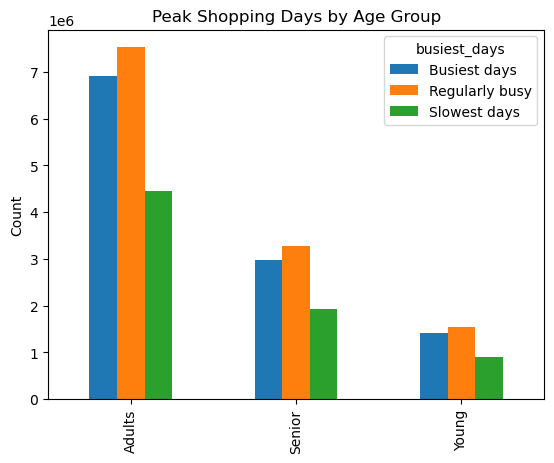

In [69]:
BarChart_Age_Busiestdays = Cross_Age_Busiestdays.plot.bar()
plt.title('Peak Shopping Days by Age Group')
plt.xlabel('')
plt.ylabel('Count')

### Observation: 
The bar chart illustrates how different age groups vary in their shopping activity across the busiest days of the week. Adults make up the largest portion of high-activity shoppers, followed by seniors, while younger individuals represent the smallest segment. This trend suggests that middle-aged and older customers are more consistent in their shopping routines, possibly due to established household needs or work schedules. Younger shoppers, who have the lowest engagement, may exhibit more irregular purchasing patterns. Understanding these trends can help businesses optimize promotions and tailor marketing strategies to align with peak shopping times for each age group.

In [71]:
# Exporting the bar chart
BarChart_Age_Busiestdays.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'BarChart_Age_BusiestDays_.png'))

### Data Security:

When handling Instacart’s new data, security risks must be considered, particularly regarding Personally Identifiable Information (PII) such as names, addresses, and payment details. Before analysis, all PII should be anonymized, encrypted, or removed to prevent unauthorized access and ensure compliance with privacy laws like GDPR and CCPA. Secure storage, access controls, and data masking techniques should be implemented to protect customer information. Additionally, ensuring restricted access to sensitive data prevents breaches and maintains confidentiality. Ethical handling of PII safeguards both customers and the company, reducing legal risks and ensuring data integrity.

#### To address the security implications of Personally Identifiable Information (PII) in the Instacart data, the following steps should be taken:

Inform Senior Colleagues: Raise concerns about potential privacy risks and seek guidance on best practices.

Compliance with Data Regulations: Ensure adherence to laws.

Anonymization & Encryption: Remove or mask sensitive details such as names, addresses, and financial data to prevent unauthorized linking.

Access Control & Secure Storage: Restrict PII access to authorized personnel and store data securely to prevent breaches.